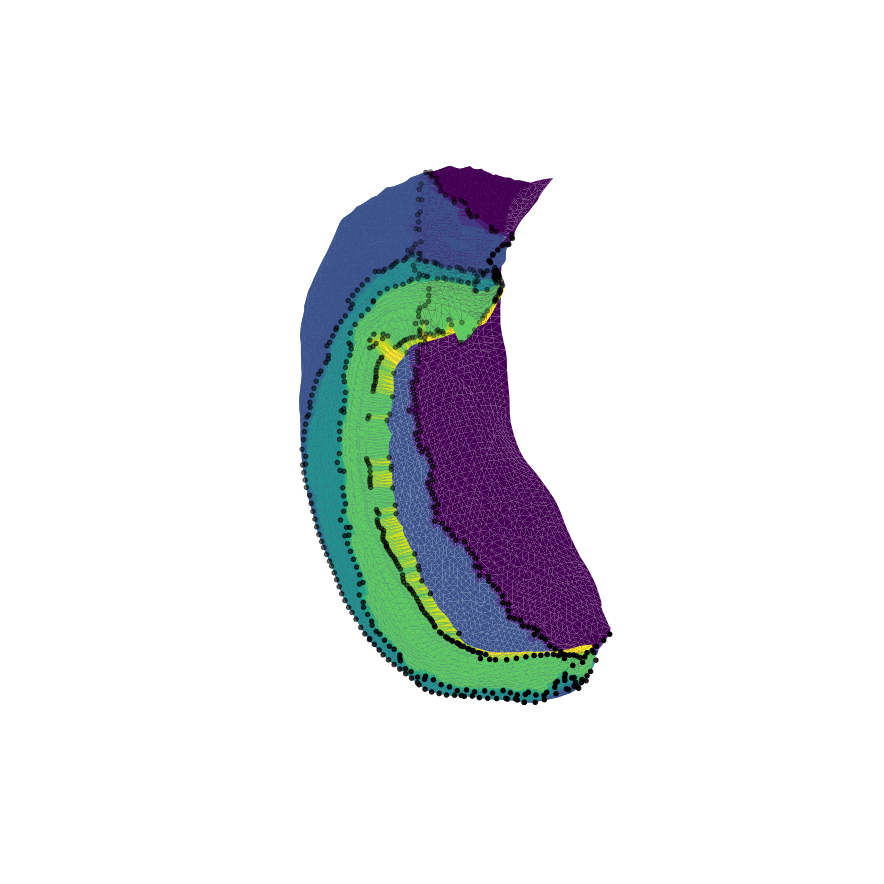

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib
import sys
from hippunfold_toolbox import plotting
import importlib
importlib.reload(plotting)

micapipe_dir = '/data/mica3/BIDS_MICs/derivatives/micapipe'
hippunfold_dir = '/data/mica3/BIDS_MICs/derivatives/hippunfold_v1.0.0/hippunfold'

subject = 'HC002'
session = '01'
hemi = ['L','R']
den = '0p5mm'
label = ['hipp','dentate'] #the dentate gyrus is given a separate surface. Here we will include it but this is optional.

gii = nib.load(f'{hippunfold_dir}/sub-{subject}/surf/sub-{subject}_hemi-L_space-T1w_den-{den}_label-hipp_midthickness.surf.gii')
vertices = gii.get_arrays_from_intent('NIFTI_INTENT_POINTSET')[0].data
faces = gii.get_arrays_from_intent('NIFTI_INTENT_TRIANGLE')[0].data
borders = nib.load(f'{hippunfold_dir}/sub-{subject}/surf/sub-{subject}_hemi-L_space-T1w_den-{den}_label-hipp_subfields.label.gii')
borders = borders.darrays[0].data

# plot only the very first timepoint
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,16), subplot_kw={'projection': "3d"})
plotting.surfplot_cdata(ax,borders,faces,vertices)
plotting.highlight_subfields(ax,surface,borders)
ax.view_init(elev=90, azim=-90)
